Task 1 started.
Task 2 started.
Task 3 started.
Task 1 completed.
Task 3 completed.
Task 2 completed.


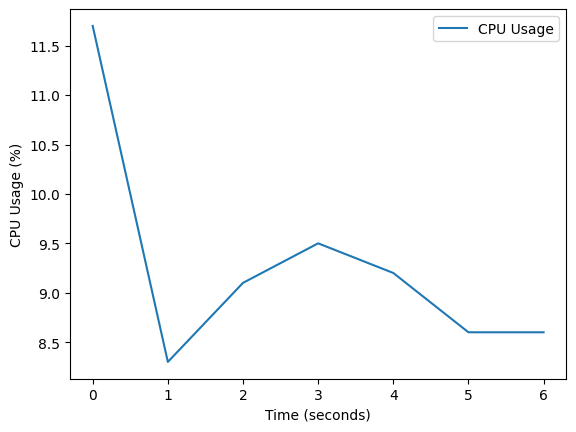

In [1]:
import time
import threading
import random
import psutil
import matplotlib.pyplot as plt

def simulate_task(task_name, burst_time):
    print(f"Task {task_name} started.")
    time.sleep(burst_time)
    print(f"Task {task_name} completed.")

def monitor_cpu_usage(interval, data):
    while True:
        cpu_percent = psutil.cpu_percent(interval=interval)
        data.append(cpu_percent)

def main():
    num_tasks = int(input("Enter the number of tasks: "))
    scheduling_algorithm = input("Enter scheduling algorithm (FCFS/SJF/RR/Priority): ")

    tasks = []
    for i in range(num_tasks):
        burst_time = random.randint(1, 10)  # Random burst time for simplicity
        tasks.append((i + 1, burst_time))

    if scheduling_algorithm == "FCFS":
        tasks.sort(key=lambda x: x[0])
    elif scheduling_algorithm == "SJF":
        tasks.sort(key=lambda x: x[1]1)
    # Add more algorithms as needed.

    cpu_data = []
    monitor_thread = threading.Thread(target=monitor_cpu_usage, args=(1, cpu_data))
    monitor_thread.daemon = True
    monitor_thread.start()

    threads = []
    for task in tasks:
        thread = threading.Thread(target=simulate_task, args=task)
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    # Plot CPU usage
    plt.plot(cpu_data, label="CPU Usage")
    plt.xlabel("Time (seconds)")
    plt.ylabel("CPU Usage (%)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Core 1 tasks:
[(1, 9), (3, 3)]
Task 1 started.
Task 3 started.
Task 3 completed.
Task 1 completed.
Core 2 tasks:
[(2, 2)]
Task 2 started.
Task 2 completed.


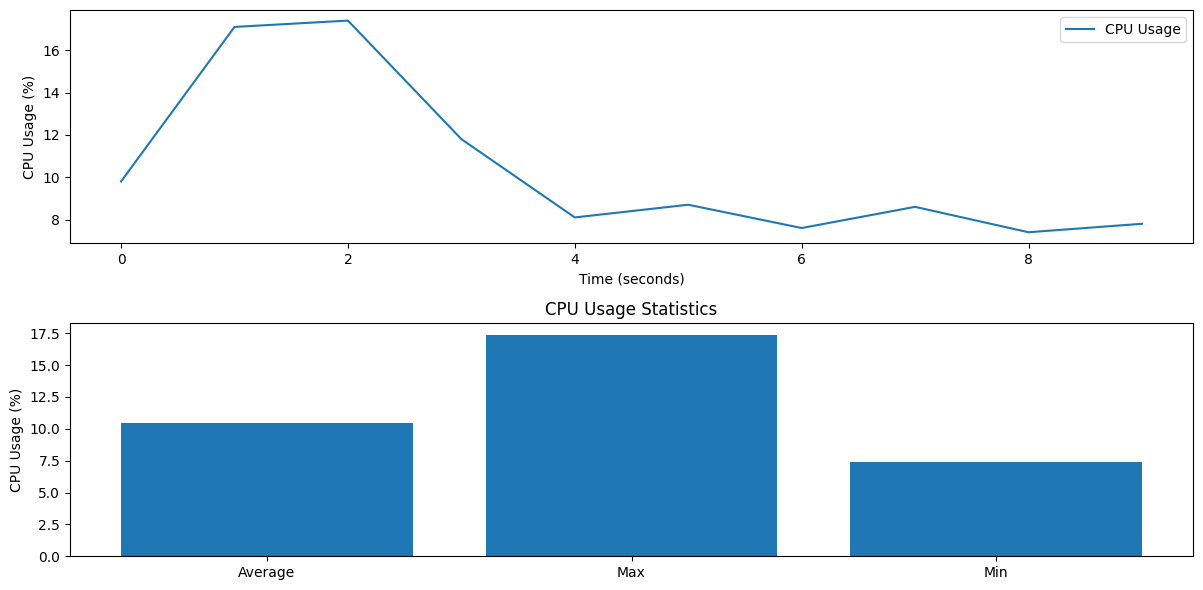

In [3]:
import time
import threading
import random
import psutil
import matplotlib.pyplot as plt

def simulate_task(task_name, burst_time):
    print(f"Task {task_name} started.")
    time.sleep(burst_time)
    print(f"Task {task_name} completed.")

def monitor_cpu_usage(interval, data):
    while True:
        cpu_percent = psutil.cpu_percent(interval=interval)
        data.append(cpu_percent)

def load_balance_tasks(tasks, num_cores):
    task_queues = [[] for _ in range(num_cores)]
    for i, task in enumerate(tasks):
        task_queues[i % num_cores].append(task)
    return task_queues

def execute_tasks(task_queue):
    threads = []
    for task in task_queue:
        thread = threading.Thread(target=simulate_task, args=task)
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()

def main():
    num_tasks = int(input("Enter the number of tasks: "))
    num_cores = int(input("Enter the number of CPU cores: "))
    scheduling_algorithm = input("Enter scheduling algorithm (FCFS/SJF/RR/Priority): ")

    tasks = []
    for i in range(num_tasks):
        burst_time = random.randint(1, 10)  # Random burst time for simplicity
        tasks.append((i + 1, burst_time))

    if scheduling_algorithm == "FCFS":
        tasks.sort(key=lambda x: x[0])
    elif scheduling_algorithm == "SJF":
        tasks.sort(key=lambda x: x[1])
    # Add more algorithms as needed.

    cpu_data = []
    monitor_thread = threading.Thread(target=monitor_cpu_usage, args=(1, cpu_data))
    monitor_thread.daemon = True
    monitor_thread.start()

    task_queues = load_balance_tasks(tasks, num_cores)

    for i, task_queue in enumerate(task_queues):
        print(f"Core {i + 1} tasks:")
        print(task_queue)
        execute_tasks(task_queue)

    # Plot CPU usage
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(cpu_data, label="CPU Usage")
    plt.xlabel("Time (seconds)")
    plt.ylabel("CPU Usage (%)")
    plt.legend()

    # Calculate and display statistics
    cpu_avg = sum(cpu_data) / len(cpu_data)
    cpu_max = max(cpu_data)
    cpu_min = min(cpu_data)

    plt.subplot(2, 1, 2)
    plt.bar(['Average', 'Max', 'Min'], [cpu_avg, cpu_max, cpu_min])
    plt.ylabel("CPU Usage (%)")
    plt.title("CPU Usage Statistics")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Core 1 tasks:
[(1, 9), (4, 2)]
Task 1 started.
Task 1 completed.
Task 4 started.
Task 4 completed.
Core 2 tasks:
[(2, 3), (5, 8)]
Task 2 started.
Task 2 completed.
Task 5 started.
Task 5 completed.
Core 3 tasks:
[(3, 8)]
Task 3 started.
Task 3 completed.


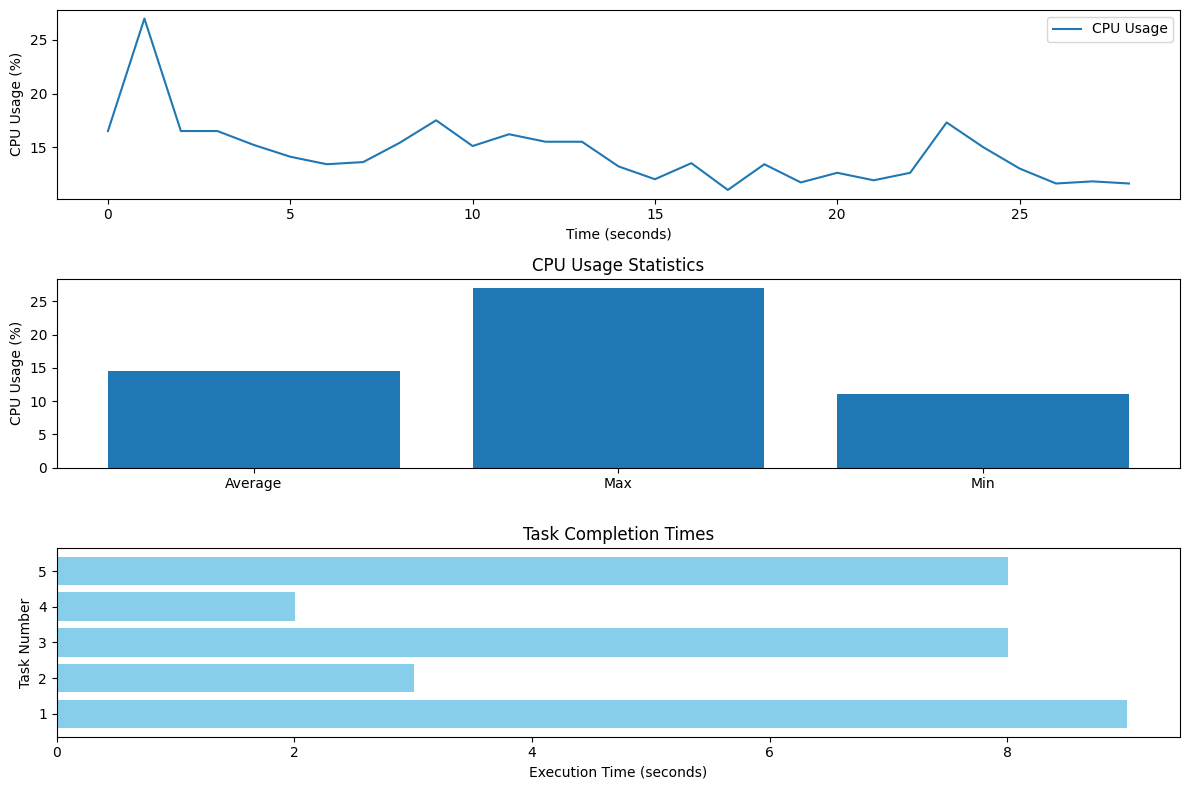

In [4]:
import time
import threading
import random
import psutil
import matplotlib.pyplot as plt

def simulate_task(task_name, burst_time):
    print(f"Task {task_name} started.")
    time.sleep(burst_time)
    print(f"Task {task_name} completed.")

def monitor_cpu_usage(interval, data):
    while True:
        cpu_percent = psutil.cpu_percent(interval=interval)
        data.append(cpu_percent)

def load_balance_tasks(tasks, num_cores):
    task_queues = [[] for _ in range(num_cores)]
    for i, task in enumerate(tasks):
        task_queues[i % num_cores].append(task)
    return task_queues

def execute_tasks(task_queue, completion_times):
    threads = []
    for task in task_queue:
        start_time = time.time()
        simulate_task(*task)
        end_time = time.time()
        completion_times.append((task[0], start_time, end_time))

def main():
    num_tasks = int(input("Enter the number of tasks: "))
    num_cores = int(input("Enter the number of CPU cores: "))
    scheduling_algorithm = input("Enter scheduling algorithm (FCFS/SJF/RR/Priority): ")

    tasks = []
    for i in range(num_tasks):
        burst_time = random.randint(1, 10)  # Random burst time for simplicity
        tasks.append((i + 1, burst_time))

    if scheduling_algorithm == "FCFS":
        tasks.sort(key=lambda x: x[0])
    elif scheduling_algorithm == "SJF":
        tasks.sort(key=lambda x: x[1])
    # Add more algorithms as needed.

    cpu_data = []
    completion_times = []
    monitor_thread = threading.Thread(target=monitor_cpu_usage, args=(1, cpu_data))
    monitor_thread.daemon = True
    monitor_thread.start()

    task_queues = load_balance_tasks(tasks, num_cores)

    for i, task_queue in enumerate(task_queues):
        print(f"Core {i + 1} tasks:")
        print(task_queue)
        execute_tasks(task_queue, completion_times)

    # Plot CPU usage
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(cpu_data, label="CPU Usage")
    plt.xlabel("Time (seconds)")
    plt.ylabel("CPU Usage (%)")
    plt.legend()

    # Calculate and display statistics
    cpu_avg = sum(cpu_data) / len(cpu_data)
    cpu_max = max(cpu_data)
    cpu_min = min(cpu_data)

    plt.subplot(3, 1, 2)
    plt.bar(['Average', 'Max', 'Min'], [cpu_avg, cpu_max, cpu_min])
    plt.ylabel("CPU Usage (%)")
    plt.title("CPU Usage Statistics")

    # Plot task completion times
    task_numbers, start_times, end_times = zip(*completion_times)
    plt.subplot(3, 1, 3)
    plt.barh(task_numbers, [end - start for start, end in zip(start_times, end_times)], color='skyblue')
    plt.xlabel("Execution Time (seconds)")
    plt.ylabel("Task Number")
    plt.title("Task Completion Times")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Task 1 started.
Task 1 completed.


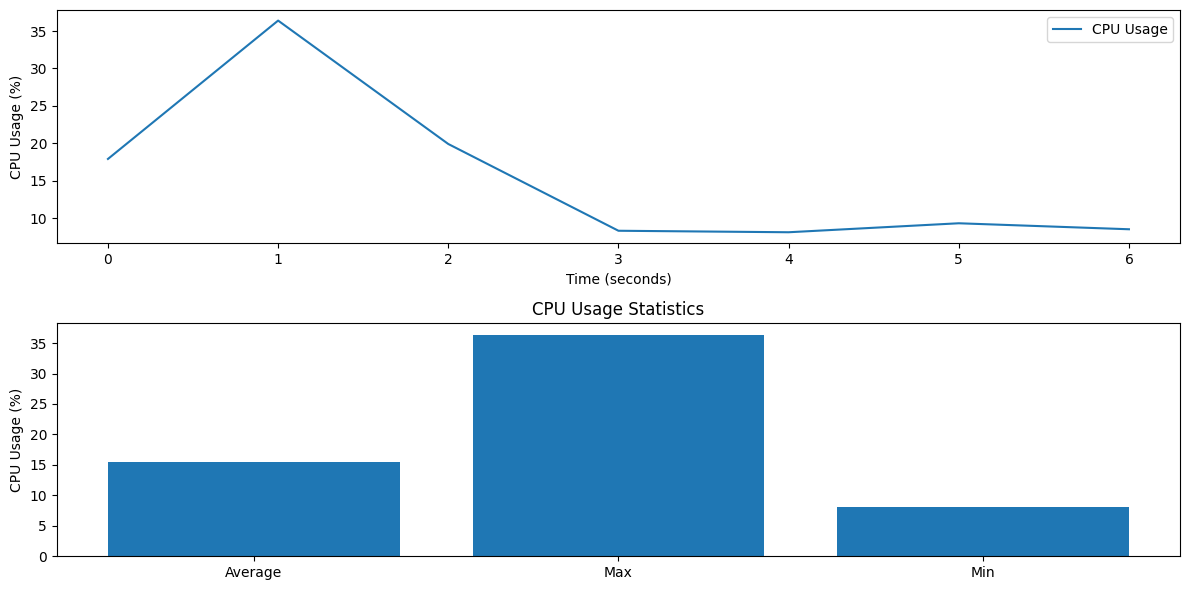

In [2]:
import time
import threading
import random
import psutil
import matplotlib.pyplot as plt

def simulate_task(task_name, burst_time):
    print(f"Task {task_name} started.")
    time.sleep(burst_time)
    print(f"Task {task_name} completed.")

def monitor_cpu_usage(interval, data):
    while True:
        cpu_percent = psutil.cpu_percent(interval=interval)
        data.append(cpu_percent)

def main():
    num_tasks = int(input("Enter the number of tasks: "))
    scheduling_algorithm = input("Enter scheduling algorithm (FCFS/SJF/RR/Priority): ")

    tasks = []
    for i in range(num_tasks):
        burst_time = random.randint(1, 10)  # Random burst time for simplicity
        tasks.append((i + 1, burst_time))

    if scheduling_algorithm == "FCFS":
        tasks.sort(key=lambda x: x[0])
    elif scheduling_algorithm == "SJF":
        tasks.sort(key=lambda x: x[1])
    # Add more algorithms as needed.

    cpu_data = []
    monitor_thread = threading.Thread(target=monitor_cpu_usage, args=(1, cpu_data))
    monitor_thread.daemon = True
    monitor_thread.start()

    threads = []
    for task in tasks:
        thread = threading.Thread(target=simulate_task, args=task)
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    # Plot CPU usage
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(cpu_data, label="CPU Usage")
    plt.xlabel("Time (seconds)")
    plt.ylabel("CPU Usage (%)")
    plt.legend()

    # Calculate and display statistics
    cpu_avg = sum(cpu_data) / len(cpu_data)
    cpu_max = max(cpu_data)
    cpu_min = min(cpu_data)

    plt.subplot(2, 1, 2)
    plt.bar(['Average', 'Max', 'Min'], [cpu_avg, cpu_max, cpu_min])
    plt.ylabel("CPU Usage (%)")
    plt.title("CPU Usage Statistics")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
